<a href="https://colab.research.google.com/github/LohithVarun/CSA4736-DeepLearningPrograms/blob/main/Program-15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

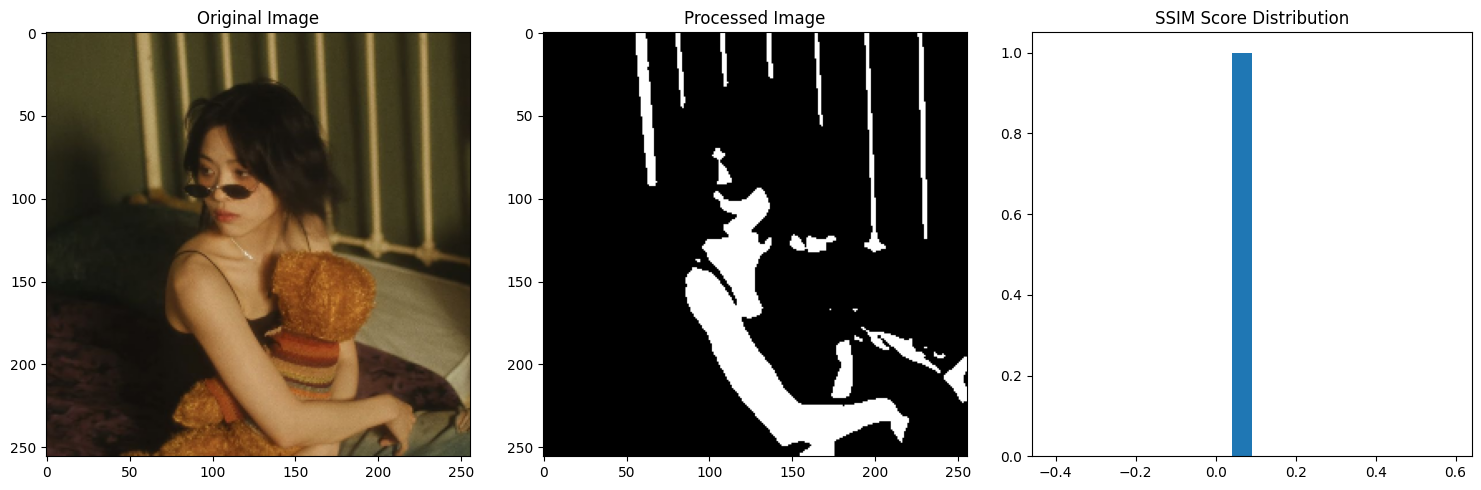

Mean SSIM: 0.0908
Standard Deviation SSIM: 0.0000


In [14]:
#R.Lohith Varun 192224215
import cv2
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from skimage.metrics import structural_similarity as ssim

def load_images(path):

    if os.path.isfile(path):
        img = cv2.imread(path)
        img = cv2.resize(img, (256, 256))
        return np.array([img])
    elif os.path.isdir(path):
        images = []
        for filename in os.listdir(path)[:10]:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                img = cv2.imread(os.path.join(path, filename))
                img = cv2.resize(img, (256, 256))
                images.append(img)
        return np.array(images)
    else:
        raise ValueError("Invalid path: Path must be a file or a directory.")


def process_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    denoised = cv2.GaussianBlur(gray, (5, 5), 0)
    _, binary = cv2.threshold(denoised, 127, 255, cv2.THRESH_BINARY)
    return binary

def evaluate_performance(original_images, processed_images):
    ssim_scores = []
    for orig, proc in zip(original_images, processed_images):
        score = ssim(cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY), proc)
        ssim_scores.append(score)

    return {
        'mean_ssim': np.mean(ssim_scores),
        'std_ssim': np.std(ssim_scores),
        'ssim_scores': ssim_scores
    }

path = "ryujin icon.jpeg"
images = load_images(path)

processed_images = [process_image(img) for img in images]

metrics = evaluate_performance(images, processed_images)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(processed_images[0], cmap='gray')
plt.title('Processed Image')

plt.subplot(133)
plt.hist(metrics['ssim_scores'], bins=20)
plt.title('SSIM Score Distribution')

plt.tight_layout()
plt.show()

print(f"Mean SSIM: {metrics['mean_ssim']:.4f}")
print(f"Standard Deviation SSIM: {metrics['std_ssim']:.4f}")